In [ ]:
#importing
import numpy as np
import pandas as pd
import datetime as dt
import re

# 1. Data Cleaning


Import dataset and drop irrelevant columns:

In [ ]:
data_wd = "C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_raw.csv"
df1 = pd.read_csv(data_wd,header=None).astype("str")

dropped_column = [0,2,3,5,11,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,50,52,54,56,58,59,60,62,63,64,65,66,67,69]
df = df1.drop(dropped_column,axis=1)
df.index = range(21299)
df.columns = ["district","price","layout","rel_floor","total_floor","area_size","config","building_type","direction","structure","renovation_status","no_of_units","elevator","date_on_market","transact_property","last_transact_date","function","age_limit","property_belong","upload_photo","loc","avail_visit_time"]

## 1.1 Extraction of numerical values

In [ ]:
#converting price to float
pr = df["price"]
#for i in range(len(pr)):
#  if(pr[i].find("万")==-1):
#    print(i)
#df.iloc[2121],改一下那条record
r1_reformat = ["pudong","371万","2室2厅1厨1卫","中楼层","共6层","72.88㎡","平层","板楼","南 北","砖混结构","简装","一梯两户","无","2022-07-09","商品房","2006-06-06","普通住宅","满五年","共有","已上传房本照片","\xa0外环外","\n" ]
r2_reformat = ["pudong","213万","2室1厅1厨1卫","中楼层","共6层","70.31㎡","平层","板楼","南","砖混结构","简装","一梯四户","无","2022-03-03","商品房","2020-03-23","普通住宅","满两年","非共有","已上传房本照片","\n","\n"]
df.iloc[2121]=r1_reformat
df.iloc[2165]=r2_reformat
for i in range(len(pr)):
  price = df.iloc[i]["price"]
  price = price.strip()
  price = price[:-1]
  price = float(price)*10000
  df.loc[i,"price"]=price

In [ ]:
# area size to float
asi = df["area_size"]
for i in range(len(asi)):
  size = df.iloc[i]["area_size"]
  size = size.strip()
  size = size.strip("'")
  size = size[:-1]
  size = float(size)
  df.loc[i,"area_size"]=size

In [ ]:
#layout_conversion
lo = df["layout"]
for i in range(len(lo)):
  layout = df.iloc[i]["layout"]
  layout = layout.strip()
  layout = layout.strip('"')
  layout = layout.strip("[")
  layout = layout.strip("'")
  df.loc[i,"layout"]=layout

In [ ]:
for i in range(len(lo)):
  layout = df.iloc[i]["layout"]
  if(len(layout)!=8):
    print(i)
#室厅厨卫 4*n matrices, item 13972 as an exception

13972


In [ ]:
#split the column into 4 columns
lo = df["layout"]
bedroom_no = []
parlour_no = []
kitchen_no = []
toilet_no = []
for i in range(len(lo)):
  strr = lo[i]
  if i == 13972:
    bedroom_no.append(10)
    parlour_no.append(1)
    kitchen_no.append(0)
    toilet_no.append(1)
  #elif strr.find("室")!=1 or strr.find("厅")!=3 or strr.find("厨")!=5 or strr.find("卫")!=7:
  else:
    bedroom_no.append(int(strr[0]))
    parlour_no.append(int(strr[2]))
    kitchen_no.append(int(strr[4]))
    toilet_no.append(int(strr[6]))
df['bedrm_no']=bedroom_no
df['parlour_no']=parlour_no
df['kitchen_no']=kitchen_no
df['toilet_no']=toilet_no

In [ ]:
#total_floor
tf = df["total_floor"]
for i in range(len(tf)):
  totf = df.iloc[i]["total_floor"]
  totf = totf.strip()
  totf = totf.strip("'")
  totf = totf.strip(")")
  totf = totf[:-1]
  totf = int(totf[1:])
  df.loc[i,"total_floor"] = totf

Remove trivial characters

In [ ]:
#strip formatting 
easy_strip = ["config","building_type","rel_floor","direction","structure","renovation_status","no_of_units","elevator","date_on_market","transact_property","last_transact_date","function","age_limit","property_belong","upload_photo","loc","avail_visit_time"]
structure = df["structure"]
for i in easy_strip:
    for j in range(len(structure)):
      bti = df.iloc[j][i]
      bti = bti.strip()
      bti = bti.strip("'")
      df.loc[j,i] = bti

Convert date information(last transaction date, and date on market) to the number of days from now.

In [ ]:
#available time data
tim = df["avail_visit_time"]
for j in range(len(tim)):
  tim = df.iloc[j]["avail_visit_time"]
  tim = tim.strip("]")
  tim = tim.strip("'")
  df.loc[j,"avail_visit_time"]=tim
#upload photo
#location data
pho = df["upload_photo"]
for j in range(len(pho)):
  pho = df.iloc[j]["upload_photo"]
  pho = pho.strip("]")
  pho = pho.strip("'")
  df.loc[j,"upload_photo"]=pho

In [ ]:
date1 = df["date_on_market"]
date1.tail()

21294    2022-08-03
21295    2019-10-17
21296    2020-12-28
21297    2021-02-28
21298    2022-07-17
Name: date_on_market, dtype: object

In [ ]:
now = dt.date.today()
date1 = df["date_on_market"]
date2 = df["last_transact_date"]
for i in range(len(date1)):
 datetemp1 = now -dt.date.fromisoformat(date1[i])
 df.loc[i,"date_on_market"]=datetemp1.days

In [ ]:
for i in range(len(date2)):
  if date2[i].find("暂无数据")!=-1:
    continue
  else:
    datetemp2 = now-dt.date.fromisoformat(date2[i])
    df.loc[i,"last_transact_date"]=datetemp2.days

In [ ]:
for t in range(len(date1)):
  str1 = df["loc"][t]
  if(type(str1)==str):
    str1 = str1.strip()
    str1 = str1.strip("\\")
    str1 = str1.strip("xa0")
    str1 = str1.strip("xa1")
    str1 = str1.strip('"')
    str1 = str1.strip("]")
    str1 = str1.strip("'")
    df.loc[t,"loc"] = str1

Replace "暂无数据", "\n" with np.nan

In [ ]:
column_name = ["district","rel_floor","config","building_type","direction","structure","renovation_status","no_of_units","elevator","date_on_market","transact_property","last_transact_date","function","age_limit","property_belong","upload_photo","loc","avail_visit_time"]
for j in column_name:
  for i in range(len(date1)):
    if(type(df[j][i])!=str):
      continue
    elif(df[j][i].find("暂无数据")!=-1):
      df.loc[i,j]=np.NaN
    elif(df[j][i].find("\n")!=-1):
      df.loc[i,j]=np.NaN

In [ ]:
#elevator
ele = df["elevator"]
for i in range(len(ele)):
  if(ele[i]=="有"):
    df.loc[i,"elevator"]=1
  elif ele[i]=="无":
    df.loc[i,"elevator"]=0
  else:
    df.loc[i,"elevator"]=np.nan

In [ ]:
ar1 = df["no_of_units"]
stair = []
unit = []
for i in range(len(ar1)):
  str1 = df["no_of_units"][i]
  if (str1.find("梯")== -1):
    stair.append(np.NaN)
    unit.append(np.NaN)
  else:
    inde = str1.index("梯")
    if inde > 1:
      stair.append(str1[0:(inde-1)])
    else:
      stair.append(str1[0])
    str1 = str1[:-1]
    unit.append(str1[(inde+1):])

x = np.array(stair)
y = np.array(unit)
xu = np.unique(x)
yu = np.unique(y)
xu1 = xu.tolist()
yu1 = yu.tolist()

In [ ]:
print(xu)
print(yu)
xup = [np.NaN,1,7,3,2,9,2,5,8,6,10,4] #preparing the integer vector to substitute the respected in vector in Chinese character
yup = [np.NaN,1,100,7,77,74,3,30,31,37,33,32,35,36,34,2,9,20,21,27,23,29,22,25,28,26,24,5,50,51,57,53,59,52,55,58,56,8,80,84,6,65,66,10,11,17,13,19,12,15,18,16,14,4,40,41,47,43,42,45,46]


['nan' '一' '七' '三' '两' '九' '二' '五' '八' '六' '十' '四']
['nan' '一' '一百' '七' '七十七' '七十四' '三' '三十' '三十一' '三十七' '三十三' '三十二' '三十五'
 '三十六' '三十四' '两' '九' '二十' '二十一' '二十七' '二十三' '二十九' '二十二' '二十五' '二十八' '二十六'
 '二十四' '五' '五十' '五十一' '五十七' '五十三' '五十九' '五十二' '五十五' '五十八' '五十六' '八' '八十'
 '八十四' '六' '六十五' '六十六' '十' '十一' '十七' '十三' '十九' '十二' '十五' '十八' '十六' '十四'
 '四' '四十' '四十一' '四十七' '四十三' '四十二' '四十五' '四十六']


In [ ]:
xu1 = xu.tolist()
yu1 = yu.tolist()
for i in range(len(stair)):
  if(stair[i] in [np.nan]):
    continue
  else:
    stair[i]=xup[xu1.index(stair[i])]
for j in range(len(unit)):
  if(unit[j] in [np.nan]):
    continue
  else:
    unit[j]=yup[yu1.index(unit[j])]


In [ ]:
df["stair"]=stair
df["unit"]=unit
st = np.array(stair)
un = np.array(unit)
proportion = np.divide(st,un)
df["proportion"]=proportion

## 1.2 Dummy Encoding

In [ ]:
rf = df["rel_floor"]
rfp = np.array(rf)
print(np.unique(rfp))

['中楼层' '低楼层' '高楼层']


In [ ]:
df2 = pd.get_dummies(pd.Series(rf))
df2.columns=["mid_floor","lower_floor","higher_floor"]
df = pd.concat([df,df2],axis=1)

In [ ]:
config = df["config"]
con = np.array(config)
for i in range(len(con)):
  con[i]=str(con[i])
print(np.unique(con))

['108.88㎡' '182.54㎡' '303.19㎡' '356.3㎡' '403.3㎡' '538.45㎡' '555.51㎡' 'nan'
 '复式' '平层' '跃层' '错层']


In [ ]:
#we found that there are duplicated area size data in the config data, and removed them in this section
for i in range(len(con)):
  if(con[i].find("㎡")!=-1):
    df.loc[i,"config"]=np.nan

In [ ]:
config = df["config"]
df2 = pd.get_dummies(pd.Series(config))
df2.columns=["duplex_config","levelling_config","yue_config","split_level_config"]
df = pd.concat([df,df2],axis=1)

In [ ]:
bt = df["building_type"]
btt = np.array(bt)
for i in range(len(btt)):
  btt[i]=str(btt[i])
print(np.unique(btt))

['nan' '塔楼' '平房' '未知结构' '板塔结合' '板楼' '框架结构' '砖混结构' '钢混结构']


In [ ]:
#horizontal position changes are observed, need to be adjusted back to the right format 
anomaly_list = []
for i in range(len(btt)):
  if(btt[i]=="钢混结构" or btt[i]=="未知结构" or btt[i]=="框架结构" or btt[i]=="砖混结构"):
    anomaly_list.append(i)
anomaly_list

[804,
 807,
 1166,
 1169,
 1183,
 1243,
 4174,
 5398,
 5479,
 5604,
 5651,
 5666,
 5730,
 6602,
 10736,
 11783,
 12230,
 14051,
 14060,
 14158,
 14193,
 14236,
 14241,
 14278,
 14286,
 14365,
 14367,
 14371,
 14372,
 14376,
 14378,
 14382,
 14383,
 14384,
 14385,
 14387,
 14388,
 14391,
 14394,
 14395,
 14594,
 14604,
 14799,
 14987,
 14988,
 15107,
 15154,
 15295,
 15372,
 15872,
 17057,
 17105,
 17109,
 17115,
 17116,
 17135,
 17150,
 17327,
 17354,
 17500,
 18529,
 18717,
 18846,
 19019,
 19111,
 19697,
 20693,
 20752,
 20777,
 20781,
 20784,
 20785,
 20786,
 20787,
 20791,
 20794,
 20796,
 20878,
 20890,
 20923,
 21008,
 21009,
 21244]

In [ ]:
df_correct = pd.read_csv(data_wd,header=None).astype("str")
df_correct.index = range(21299)

In [ ]:
for i in anomaly_list:
  struct = df.iloc[i]["building_type"]
  bt = df.iloc[i]["structure"]
  renova = df.iloc[i]["direction"]
  df.loc[i,"building_type"]=bt
  df.loc[i,"structure"]=struct
  df.loc[i,"renovation_status"]=renova
  df.loc[i,"direction"]=df_correct.iloc[i,11]

In [ ]:
df.iloc[anomaly_list]

,district,price,layout,rel_floor,total_floor,area_size,config,building_type,direction,structure,...,stair,unit,proportion,mid_floor,lower_floor,higher_floor,duplex_config,levelling_config,yue_config,split_level_config
804,pudong,13800000.0,4室2厅1厨4卫,低楼层,4,358.84,NaN,联排,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
807,pudong,14000000.0,4室2厅1厨2卫,中楼层,4,245.0,NaN,NaN,'南 北',未知结构,...,NaN,NaN,NaN,1,0,0,0,0,0,0
1166,pudong,14500000.0,6室3厅1厨4卫,低楼层,4,361.0,NaN,联排,'南 北',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
1169,pudong,26000000.0,4室2厅1厨3卫,低楼层,3,246.03,NaN,双拼,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
1183,pudong,77000000.0,6室3厅1厨4卫,低楼层,2,527.71,NaN,独栋,'南 北',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20890,qingpu,8600000.0,3室2厅1厨3卫,低楼层,4,182.54,NaN,叠拼,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
20923,qingpu,10000000.0,4室2厅3厨3卫,低楼层,1,294.16,NaN,NaN,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
21008,qingpu,33000000.0,4室2厅1厨4卫,低楼层,1,563.21,NaN,NaN,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0
21009,qingpu,24500000.0,3室2厅1厨3卫,低楼层,3,229.75,NaN,NaN,'南',钢混结构,...,NaN,NaN,NaN,0,1,0,0,0,0,0


In [ ]:
#building type
bt = df["building_type"]
btt = np.array(bt)
null_list = []
for i in range(len(btt)):
  btt[i]=str(btt[i])
  if btt[i]=="nan":
    null_list.append(i)
print(np.unique(btt))
#print(null_list)

['nan' '双拼' '叠拼' '塔楼' '平房' '板塔结合' '板楼' '独栋' '联排']


In [ ]:
building_type = df["building_type"]
df2 = pd.get_dummies(pd.Series(building_type))
for k in range(df2.shape[0]):
  if np.isin(k,null_list):
    for j in df2.columns:
      df2.loc[k,j]=np.nan
  else:
    continue
df2.columns=["doublepin","diepin","talou","pingfang","bantajiehe","banlou","dudong","lianpai"]
df = pd.concat([df,df2],axis=1)

In [ ]:
direct = df["direction"]
directt = np.array(direct)
for i in range(len(directt)):
  directt[i]=str(directt[i])
  t=directt[i]
  t = t.strip()
  t = t.strip('"')
  t = t.strip("'")
  directt[i]=t
print(np.unique(directt))


['nan' '东' '东 东北' '东 东南' '东 东南 东北' '东 东南 北' '东 东南 南' '东 东南 南 北' '东 东南 西'
 '东 北' '东 北 东北' '东 北 东南' '东 北 南' '东 南' '东 南 东南' '东 南 北' '东 南 西' '东 南 西 北'
 '东 南 西北' '东 西' '东 西 北' '东 西 南' '东 西 西南' '东 西北' '东北' '东北 东南' '东北 北'
 '东北 西南' '东南' '东南 东 南 西南' '东南 东北' '东南 东北 西北' '东南 北' '东南 北 东北' '东南 南'
 '东南 南 北' '东南 西' '东南 西北' '东南 西南' '北' '北 东' '北 东 西' '北 东北' '北 南' '北 南 东'
 '北 西' '北 西北' '北 西南' '南' '南 东' '南 东 北' '南 东 北 西' '南 东 西' '南 东北' '南 东北 北'
 '南 东南' '南 北' '南 北 东' '南 北 东南' '南 北 西' '南 北 西南' '南 西' '南 西 北' '南 西 西北'
 '南 西 西南' '南 西北' '南 西南' '南 西南 北' '南 西南 西' '南 西南 西 东北' '南 西南 西 北' '南 西南 西北'
 '西' '西 东' '西 东 东南' '西 东北' '西 北' '西 北 南' '西 南' '西 南 北' '西 西北' '西 西北 东北'
 '西 西北 北' '西 西南' '西北' '西北 东北' '西北 东北 北 西 东' '西北 北' '西南' '西南 东北' '西南 北'
 '西南 南' '西南 西' '西南 西 北' '西南 西 西北' '西南 西北']


In [ ]:
east = []
southeast = []
south = []
southwest = []
west = []
northwest = []
north = []
northeast = []
for i in range(len(directt)):
  str1 = directt[i]
  if str1 == "nan":
    east.append(np.nan)
    south.append(np.nan)
    west.append(np.nan)
    north.append(np.nan)
    southwest.append(np.nan)
    northwest.append(np.nan)
    southeast.append(np.nan)
    northeast.append(np.nan)
  else:
    arr1 = str1.split()
    for j in range(len(arr1)):
      if arr1[j]=="东":
        east.append(1)
      elif arr1[j]=="西":
        west.append(1)
      elif arr1[j]=="南":
        south.append(1)
      elif arr1[j]=="北":
        north.append(1)
      elif arr1[j]=="东南":
        southeast.append(1)
      elif arr1[j]=="西南":
        southwest.append(1)
      elif arr1[j]=="西北":
        northwest.append(1)
      elif arr1[j]=="东北":
        northeast.append(1)
    if len(east)==i:
      east.append(0)
    if len(west)==i:
      west.append(0)
    if len(north)==i:
      north.append(0)
    if len(south)==i:
      south.append(0)
    if len(northeast)==i:
      northeast.append(0)
    if len(southeast)==i:
      southeast.append(0)
    if len(southwest)==i:
      southwest.append(0)
    if len(northwest)==i:
      northwest.append(0)
df["south"]=south
df["west"]=west
df["north"]=north
df["east"]=east
df["northeast"]=northeast
df["southeast"]=southeast
df["northwest"]=northwest
df["southwest"]=southwest  

In [ ]:
struct = df["structure"]
struc = np.array(struct)
for i in range(len(struct)):
  struc[i] = str(struc[i])
print(np.unique(struc))

['未知结构' '框架结构' '混合结构' '砖木结构' '砖混结构' '钢混结构' '钢结构']


In [ ]:
df2 = pd.get_dummies(pd.Series(struct))
df2.columns=["unknown_struct","frame_struct","mixed_struct","brickwood_struct","brickmix_struct","steelmix_struct","steel_struct"]
df = pd.concat([df,df2],axis=1)

In [ ]:
renov = df["renovation_status"]
reno = np.array(renov)
for i in range(len(reno)):
  reno[i]=str(reno[i])
print(np.unique(reno))

['其他' '毛坯' '简装' '精装']


In [ ]:
df2 = pd.get_dummies(pd.Series(renov))
df2.columns = ["other","maopei","jianzhuang","jingzhuang"]
df = pd.concat([df,df2],axis=1)

In [ ]:
tp = df["transact_property"]
tpp = np.array(tp)
for i in range(len(tpp)):
  tpp[i]=str(tpp[i])
print(np.unique(tpp))

['动迁安置房' '售后公房' '商品房']


In [ ]:
df2 = pd.get_dummies(pd.Series(tp))
df2.columns = ["resettle_housing","public_housing","commercial_housing"]
df = pd.concat([df,df2],axis=1)

In [ ]:
func = df["function"]
null_list = []
funcc = np.array(func)
for i in range(len(funcc)):
  funcc[i]=str(funcc[i])
  if funcc[i] == "nan":
    null_list.append(i)
print(np.unique(funcc))
print(null_list)

['nan' '别墅' '商业办公类' '新式里弄' '旧式里弄' '普通住宅' '老公寓' '花园洋房']
[21144]


In [ ]:
df2 = pd.get_dummies(pd.Series(func))
for k in null_list:
  for j in df2.columns:
    df2.loc[k,j]=np.nan
df2.columns = ["villa","office","n_linong","o_linong","residential","apartment","garden_house"]
df = pd.concat([df,df2],axis=1)

In [ ]:
agel = df["age_limit"]
agell = np.array(agel)
null_list = []
for i in range(len(agell)):
  agell[i]=str(agell[i])
  if agell[i]=="nan":
    null_list.append(i)
print(np.unique(agell))
print(null_list)

['nan' '未满两年' '满两年' '满五年']
[2910, 2918, 2920, 2982, 3106, 3148, 3791, 4213, 4252, 4511, 4710, 4711, 6497, 6508, 6512, 6539, 6540, 6550, 6555, 6560, 6591, 6705, 6714, 6769, 6784, 6836, 6838, 6840, 6842, 6843, 6844, 6845, 6846, 6847, 6848, 6849, 6851, 6854, 6855, 6856, 6857, 6860, 6862, 6863, 6864, 6865, 6866, 6870, 6871, 6872, 6873, 6880, 6881, 6904, 6909, 6939, 6940, 6957, 6958, 6971, 6975, 6981, 6984, 6985, 6986, 6988, 6989, 6990, 6991, 6992, 6993, 6995, 6996, 6998, 6999, 7000, 7001, 7002, 7003, 7004, 7005, 7006, 7007, 7008, 7009, 7023, 7297, 7483, 7492, 7711, 7768, 7838, 7848, 7852, 7854, 7866, 7897, 8008, 8023, 8064, 8076, 8077, 8079, 8085, 8086, 8088, 8091, 8092, 8093, 8094, 8095, 8097, 8101, 8105, 8107, 8277, 8368, 8388, 8390, 8428, 8456, 9818, 9821, 9862, 9873, 10029, 10093, 10099, 10124, 10125, 10155, 10175, 10176, 10177, 10178, 10180, 10181, 10182, 10183, 10185, 10186, 10187, 10189, 10190, 10191, 10192, 10193, 10194, 10195, 10197, 10198, 10199, 10203, 10204, 10205, 10206, 10207

In [ ]:
df2 = pd.get_dummies(pd.Series(agel))
for k in null_list:
  for j in df2.columns:
    df2.loc[k,j]=np.nan
df2.columns = ["lessthan_two","beyong_two","beyond_five"]
df = pd.concat([df,df2],axis=1)

In [ ]:
prp = df["property_belong"]
prpp = np.array(prp)
for i in range(len(prpp)):
  prpp[i]=str(prpp[i])
print(np.unique(prpp))

['共有' '非共有']


In [ ]:
df2 = pd.get_dummies(pd.Series(prp))
df2.columns = ["shared","not_shared"]
df = pd.concat([df,df2],axis=1)

In [ ]:
upp = df["upload_photo"]
uppp = np.array(upp)
for i in range(len(uppp)):
  uppp[i]=str(uppp[i])
print(np.unique(uppp))

['已上传房本照片' '未上传房本照片']


In [ ]:
df2 = pd.get_dummies(pd.Series(upp))
df2.columns=["uploaded","not_uploaded"]
df = pd.concat([df,df2],axis=1)

In [ ]:
locc = df["loc"]
loccc = np.array(locc)
null_list = []
for i in range(len(loccc)):
  loccc[i]=str(loccc[i])
  if loccc[i]=="":
    null_list.append(i)
print(np.unique(loccc))
print(null_list)

['' '中环至外环' '内环内' '内环至中环' '外环外']
[4, 28, 31, 45, 93, 129, 131, 132, 133, 151, 196, 205, 241, 251, 261, 278, 347, 363, 411, 428, 451, 470, 487, 489, 502, 512, 525, 590, 593, 605, 613, 651, 667, 716, 739, 753, 766, 767, 769, 786, 841, 923, 939, 945, 953, 992, 1033, 1060, 1068, 1072, 1079, 1095, 1100, 1156, 1188, 1196, 1208, 1249, 1278, 1282, 1285, 1288, 1292, 1316, 1333, 1338, 1388, 1395, 1408, 1468, 1494, 1506, 1541, 1559, 1564, 1581, 1599, 1607, 1719, 1739, 1791, 1792, 1794, 1809, 1822, 1848, 1861, 1862, 1881, 1910, 1929, 1945, 1950, 1999, 2019, 2038, 2055, 2116, 2127, 2142, 2165, 2166, 2199, 2212, 2246, 2269, 2273, 2294, 2344, 2383, 2393, 2408, 2431, 2450, 2520, 2543, 2563, 2571, 2593, 2597, 2614, 2633, 2660, 2664, 2680, 2719, 2744, 2807, 2817, 2818, 2838, 2864, 2872, 2892, 2898, 2903, 2913, 2916, 2927, 2940, 2945, 2952, 2956, 2962, 2964, 2971, 2976, 2990, 3008, 3016, 3028, 3042, 3047, 3063, 3068, 3089, 3100, 3130, 3164, 3175, 3188, 3203, 3210, 3234, 3235, 3244, 3267, 3270, 3280, 3300

In [ ]:
locc=locc.replace("", np.nan)

In [ ]:
df2 = pd.get_dummies(pd.Series(locc))
for k in null_list:
  for j in df2.columns:
    df2.loc[k,j]=np.nan
df2.columns = ["central_outer","inner","inner_central","outer"]
df = pd.concat([df,df2],axis=1)

In [ ]:
avt = df["avail_visit_time"]
avtt = np.array(avt)
null_list = []
for i in range(len(avtt)):
  avtt[i]=str(avtt[i])
  tt = avtt[i]
  tt = tt.strip('"')
  tt = tt.strip(']')
  tt = tt.strip("'")
  tt = tt.strip("\\")
  df.loc[i,"avail_visit_time"]=tt
  avtt[i]=tt
  if avtt[i] == "":
    null_list.append(i)
print(np.unique(avtt))
print(null_list)

['' '下班后可看' '具体信息请致电经纪人' '只周末可看' '提前预约随时可看' '有租户需预约']
[2121, 2165]


In [ ]:
avt=avt.replace("",np.nan)

In [ ]:
df2 = pd.get_dummies(pd.Series(avt))
for k in null_list:
  for j in df2.columns:
    df2.loc[k,j]=np.nan
df2.columns = ["after_work","call_agent","only_weekend","reservation","rented"]
df = pd.concat([df,df2],axis=1)

In [ ]:
district = df["district"]
dist = np.array(district)
for i in range(len(dist)):
  dist[i]=str(dist[i])
print(np.unique(dist))

['baoshan' 'changning' 'chongming' 'fengxian' 'hongkou' 'huangpu'
 'jiading' 'jingan' 'jinshan' 'minhang' 'pudong' 'putuo' 'qingpu'
 'songjiang' 'xuhui' 'yangpu']


In [ ]:
df2 = pd.get_dummies(pd.Series(district))
df = pd.concat([df,df2],axis=1)

In [ ]:
# drop a dummy var for each categorical varariable to avoid multicolinearity
df = df.drop("lower_floor",axis=1)
df = df.drop("yue_config",axis=1)
df = df.drop("doublepin",axis=1)
df = df.drop("east",axis=1)
df = df.drop("unknown_struct",axis=1)
df = df.drop("other",axis=1)
df = df.drop("resettle_housing",axis=1)
df = df.drop("villa",axis=1)
df = df.drop("lessthan_two",axis=1)
df = df.drop("not_shared",axis=1)
df = df.drop("not_uploaded",axis=1)
df = df.drop("outer",axis=1)
df = df.drop("rented",axis=1)
df = df.drop("yangpu",axis=1)

In [ ]:
dropped_col = ["district","no_of_units","rel_floor","config","layout","building_type","direction","structure","renovation_status","transact_property","function","age_limit","property_belong","upload_photo","loc","avail_visit_time"]
df = df.drop(dropped_col,axis=1)
df = df.apply(pd.to_numeric)

In [ ]:
df.to_csv("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_cleaned.csv",index=False)

# 2.Data Visualization and Transformation

In [18]:
#importing
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt 

In [19]:
data_wd = "Lianjia_cleaned.csv"
#data_wd = "Lianjia_cleaned.csv"
df1 = pd.read_csv(data_wd,na_values='?')
df1 = df1.apply(pd.to_numeric)

## 2.1 Data Visualization

In [20]:
df1['log_price'] = np.log(df1['price'].values+1)
print(df1[['price', 'log_price']].head())

       price  log_price
0  4350000.0  15.285687
1  2750000.0  14.827112
2  3050000.0  14.930652
3  4500000.0  15.319588
4  2230000.0  14.617513


In [21]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

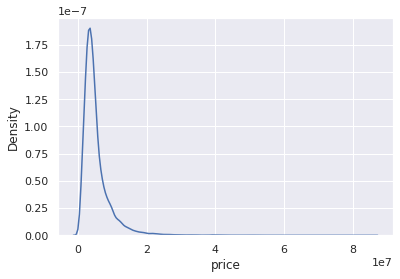

In [22]:
# Make default density plot
sns.kdeplot(df1['price'])
plt.show()

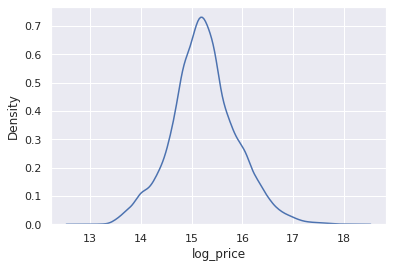

In [23]:
# Make default Boxplot
sns.kdeplot(df1['log_price'])
plt.show()

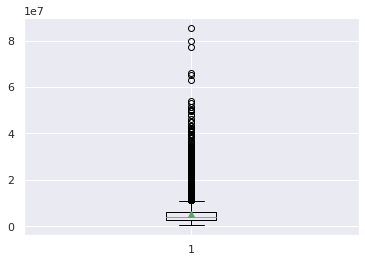

In [24]:
pyplot.boxplot(df1['price'], showmeans=True)
pyplot.savefig("price.jpg")

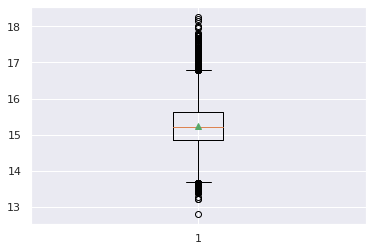

In [25]:
pyplot.boxplot(df1['log_price'],showmeans=True)
pyplot.savefig("log_price1.jpg")

## 2.2 Train test split and Log transformation

In [32]:
df1 = df1.drop(columns = ["log_price"])
X = df1.drop(columns=['price'])
y = df1['price']/1000 
log_y = np.log(y)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,log_y,test_size=0.2,random_state=4011)
Xtrain.shape

(17039, 74)

# 2.3 Data imputation

In [33]:
# summarize the number of rows with missing values for each column
for i in range(df1.shape[1]):
 n_miss = df1.iloc[0:df1.shape[0],i].isnull().sum()
 perc = n_miss / df1.shape[0] * 100
 print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 588 (2.8%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 575 (2.7%)
> 6, Missing: 0 (0.0%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 83 (0.4%)
> 11, Missing: 83 (0.4%)
> 12, Missing: 83 (0.4%)
> 13, Missing: 0 (0.0%)
> 14, Missing: 0 (0.0%)
> 15, Missing: 0 (0.0%)
> 16, Missing: 0 (0.0%)
> 17, Missing: 0 (0.0%)
> 18, Missing: 259 (1.2%)
> 19, Missing: 259 (1.2%)
> 20, Missing: 259 (1.2%)
> 21, Missing: 259 (1.2%)
> 22, Missing: 259 (1.2%)
> 23, Missing: 259 (1.2%)
> 24, Missing: 259 (1.2%)
> 25, Missing: 8 (0.0%)
> 26, Missing: 8 (0.0%)
> 27, Missing: 8 (0.0%)
> 28, Missing: 8 (0.0%)
> 29, Missing: 8 (0.0%)
> 30, Missing: 8 (0.0%)
> 31, Missing: 8 (0.0%)
> 32, Missing: 0 (0.0%)
> 33, Missing: 0 (0.0%)
> 34, Missing: 0 (0.0%)
> 35, Missing: 0 (0.0%)
> 36, Missing: 0 (0.0%)
> 37, Missing: 0 (0.0%)
> 38, Missing: 0 (0.0%)
> 39, Missing: 0 (0.0%)
> 40, Missing: 0 (0.0%)
> 41,

In [34]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,6,7,33,36]]
strategies

['1', '3', '5', '6', '7', '33', '36']

In [35]:
for s in strategies:
 # create the modeling pipeline
 pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestRegressor())])
 # evaluate the model
 cv = KFold(n_splits=5) 
 scores = cross_val_score(pipeline, Xtrain, ytrain, scoring='neg_root_mean_squared_error', cv=cv)
 # store results
 results.append(scores)
 print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

>1 -0.197 (0.003)
>3 -0.190 (0.002)
>5 -0.189 (0.002)
>6 -0.189 (0.002)
>7 -0.189 (0.001)
>33 -0.189 (0.001)
>36 -0.189 (0.001)


In [ ]:
# plot performance of pipelines with different hyperparameters for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.savefig("impute.jpg")
#pyplot.savefig("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/figures/impute.jpg")

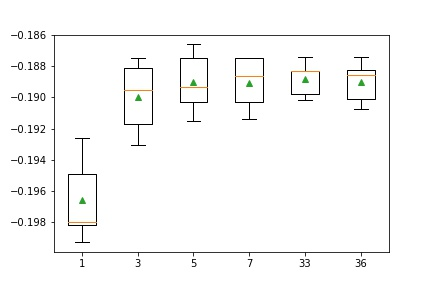
<br>Since we used five fold cross validation, the result of every each execution may differ. So we attached our result figure as the result we refer to.

In [38]:
my_imputer = KNNImputer(n_neighbors=33)
X_trained_filled = my_imputer.fit_transform(Xtrain)

# now transform test
X_test_filled = my_imputer.transform(Xtest)

## 2.4 Data Standardization

In [39]:
my_scaler= StandardScaler()
X_train_standarded = my_scaler.fit_transform(X_trained_filled)
X_test_standarded = my_scaler.transform(X_test_filled)

In [40]:
X_train_standarded = pd.DataFrame(X_train_standarded)
X_test_standarded = pd.DataFrame(X_test_standarded)
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)

In [41]:
train_data=ytrain.reset_index(drop=True).join(X_train_standarded)
test_data=ytest.reset_index(drop=True).join(X_test_standarded)
transformed_data=pd.concat([train_data, test_data], axis=0)

In [42]:
#df1.rename(columns={'price':'log_price'}, inplace = True)
colnames=df1.columns
transformed_data.columns=colnames
transformed_data.to_csv("Lianjia_tranformed.csv",index=False)
#transformed_data.to_csv("C:/Users/Lenovo/Desktop/git/STAT4011_Project1/data/Lianjia_transformed.csv",index=False)